# MSDS 422 Assignment 1 - Exploring and Visualizing Data:

This assignment focuses on bringing data into Python, exploring and visualizing data. You will need to install Python on your personal computer (Mac or Windows) prior to working on this assignment. See Python installation instructions under Modules / Technology Resources / Software for Practical Machine Learning (Python version).

As part of this assignment, you are asked to choose a variable with meaningful magnitude and examine the effects of two transformations (scaling methods) on that variable.

Formatting Python Code
Refer to Google’s Python Style Guide (https://google.github.io/styleguide/pyguide.html) for ideas about formatting Python code:

Comment often and in detail, highlighting major sections of code, describing the thinking behind the modeling and programming methods being employed.

#### Background Materials
COVID 19 is an ongoing threat.  Data for the outbreak are available here:  https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide (Links to an external site.)

Using this data, you are to conduct exploratory data analysis.  Provide appropriate descriptive statistics  / visualizations to help understand the spread of the disease (incidence) as well as its fatality rate.  You should also engage in feature creation and variable transformation.  At a bare minimum, feature creation should include generating rates per X in the population (i.e., rates per million).  Investigate time series as well as univariate and bivariate distribution graphs. 

Select one of variable and perform both min-max and standard scaling in Python.  See https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py (Links to an external site.)

 (Some methods we will learn in this course  (trees and random forests) are unaffected by monotonic transformations of the explanatory variables. Others (SVMs and neural networks) are very much affected by scaling and usually perform better when all explanatory variables have the same scale. It is often best to use scaling methods that preserve the shape of the distribution. But if there are extreme outliers or heavily skewed distributions, then log or normalizing transformations may be warranted.)
 
 #### Table of Contents
 - Data preparation (10 points)
 - Data exploration (10 points) & Data Visualization (10 points)
 - Data scaling and comparisons (10 points)
 - Insights from analysis (10 points)

## Data preparation

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import sklearn

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from IPython.display import display
from IPython.display import HTML
import datetime as dt

today = dt.datetime.today().strftime("%d %b %Y")

Download the data from opendata.ecdc.europa.eu

In [2]:
# load the data
rawdata = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv")

Prepare and clean the data
- drop NaN and NA
- convert the columns: dateRep to datetime64, popData2019 to int64
- fix dateRep not as a good date using the month, day, and year columns to construct a datetime
- limit the data set to only recent data, will include all data less than and including today
- cases and deaths should be greater than or equal to 0

In [3]:
# clean the data
#   -- eliminate NA's
data = rawdata.dropna()

#   -- redo data types of some columns
data = data.astype({ 'dateRep': 'datetime64', 'popData2019': "int64" })

#   -- fix dateRep not as a good date using the month, day, and year columns to construct a datetime
def fixdate(m,d,y):
    return pd.to_datetime(str(m) + "/" + str(d) + "/" + str(y))

data['dateRep'] = data.apply(lambda x: fixdate(x.month, x.day, x.year), axis=1)

#   -- limit the data set to only recent data, will include all data less than and including today
data = data[data['dateRep'] < pd.to_datetime('today')]

#  -- cases and deaths should be greater than or equal to 0
data = data[(data['cases'] >= 0) & (data['deaths'] >= 0)]

Inspect the data after preparation and cleanup

In [4]:
data.shape

(25337, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25337 entries, 0 to 25516
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  25337 non-null  datetime64[ns]
 1   day                      25337 non-null  int64         
 2   month                    25337 non-null  int64         
 3   year                     25337 non-null  int64         
 4   cases                    25337 non-null  int64         
 5   deaths                   25337 non-null  int64         
 6   countriesAndTerritories  25337 non-null  object        
 7   geoId                    25337 non-null  object        
 8   countryterritoryCode     25337 non-null  object        
 9   popData2019              25337 non-null  int64         
 10  continentExp             25337 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 2.3+ MB


In [6]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,2020-06-24,24,6,2020,338,20,Afghanistan,AF,AFG,38041757,Asia
1,2020-06-23,23,6,2020,310,17,Afghanistan,AF,AFG,38041757,Asia
2,2020-06-22,22,6,2020,409,12,Afghanistan,AF,AFG,38041757,Asia
3,2020-06-21,21,6,2020,546,21,Afghanistan,AF,AFG,38041757,Asia
4,2020-06-20,20,6,2020,346,2,Afghanistan,AF,AFG,38041757,Asia


In [7]:
data[data['countriesAndTerritories'] == 'United_States_of_America'].head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
24441,2020-06-24,24,6,2020,34720,826,United_States_of_America,US,USA,329064917,America
24442,2020-06-23,23,6,2020,31390,427,United_States_of_America,US,USA,329064917,America
24443,2020-06-22,22,6,2020,25793,256,United_States_of_America,US,USA,329064917,America
24444,2020-06-21,21,6,2020,34158,607,United_States_of_America,US,USA,329064917,America
24445,2020-06-20,20,6,2020,29909,678,United_States_of_America,US,USA,329064917,America


## Data exploration (10 points) & Data Visualization (10 points)

In [8]:
data.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp'],
      dtype='object')

#### Exploration - Step 1: Sum of Cases, Sum of Deaths, Fatality Rate, Reported Cases per 100,000 population,  Reported Deaths per 100,000 population -- By Continent + Country/Territory

In [9]:
# set rate / rates per 100,000
population = 100000

def get_facts(attr = 'countriesAndTerritories', population=100000, f_rate = 100):
    # get the cumulative cases and deaths by countries and territories
    cumulative_cases_deaths = data.groupby(['continentExp',attr]).\
            agg({'cases': 'sum', 'deaths': 'sum', 'popData2019': 'max'}).reset_index()#.groupby(level=0).cumsum().reset_index()

    # rename columns
    cumulative_cases_deaths.rename(columns={'cases': 'Sum of Cases', 'deaths': 'Sum of Deaths', \
                                    'popData2019': 'Population'}, inplace=True)


    # function to compute the features of:
    #   fatality_rate
    #   fatality_rate_per_100000
    #   case_rate_per_100000
    def get_features(x):
        d = {}

        d['Fatality Rate'] = x['Sum of Deaths'] / x['Sum of Cases'] * f_rate
        d['Reported Cases per 100 000 population'] = x['Sum of Cases'] / x['Population'] * population
        d['Reported Deaths per 100 000 population'] = x['Sum of Deaths'] / x['Population'] * population    

        return pd.Series(d, index=['Fatality Rate', 'Reported Cases per 100 000 population', \
                                   'Reported Deaths per 100 000 population'])

    # join the data cumulative cases and deaths with the computed features
    cumulative_cases_deaths_add_features = cumulative_cases_deaths.\
        join(cumulative_cases_deaths.apply(get_features, axis=1))
    
    return cumulative_cases_deaths_add_features

cumulative_cases_deaths_add_features = get_facts()

In [10]:
# limit columns to display in table
col_display_list = ['countriesAndTerritories', 'Sum of Cases', 'Sum of Deaths', 'Population',\
                   'Fatality Rate', 'Reported Cases per 100 000 population', \
                    'Reported Deaths per 100 000 population']

# create a summary table per continent
for c in cumulative_cases_deaths_add_features.continentExp.unique():
    # copy dataframe into a new one for display
    exp1 = cumulative_cases_deaths_add_features
    # limit the continent to the filter from loop 
    exp1 = exp1[exp1.continentExp == c]
    # limit the columns to the list contained in col_display_list
    exp1 = exp1[col_display_list]
    exp1.sort_values(by='Sum of Cases', ascending=False, inplace=True)
    # get the grand totals for: Sum of Cases, Sum of Deaths, and Population
    exp1_grand_total = pd.DataFrame(exp1.sum(axis=0),columns=['Grand Total'])
    exp1_grand_total.iloc[[0,4,5,6]] = ''
    exp1_display = pd.concat([exp1,exp1_grand_total.T])
    
    #display
    #. Header
    display(HTML("<b>" + c + "</b>"))
    #. Summary - cases
    summary_cases = 'As of ' + today + ', <b>' + "{:,}".format(exp1['Sum of Cases'].sum()) + ' cases</b> have been reported in ' + \
        c + ': ' + \
        ', '.join([str(r['countriesAndTerritories']) + ' (' + str(r['Sum of Cases']) + ')' for i, r in exp1.iterrows()]) + \
        '.'
     #. Summary - deaths
    summary_deaths = 'As of ' + today + ', <b>' + "{:,}".format(exp1['Sum of Deaths'].sum()) + ' deaths</b> have been reported in ' + \
        c + ': ' + \
        ', '.join([str(r['countriesAndTerritories']) + ' (' + str(r['Sum of Deaths']) + ')' for i, r in exp1.iterrows()]) + \
        '.'
    #. Show
    display(HTML(summary_cases))
    display(HTML(summary_deaths))
    display(exp1_display)

,countriesAndTerritories,Sum of Cases,Sum of Deaths,Population,Fatality Rate,Reported Cases per 100 000 population,Reported Deaths per 100 000 population
44,South_Africa,106108,2102,58558267,1.981,181.201,3.58959
15,Egypt,58141,2365,100388076,4.0677,57.9162,2.35586
37,Nigeria,21371,533,200963603,2.49403,10.6343,0.265222
22,Ghana,14568,95,30417858,0.652114,47.8929,0.312317
0,Algeria,12076,861,43053054,7.12984,28.0491,1.99986
6,Cameroon,12041,308,25876387,2.55793,46.5328,1.19027
34,Morocco,10264,214,36471766,2.08496,28.1423,0.586755
46,Sudan,8889,548,42813237,6.16492,20.7623,1.27998
12,Cote_dIvoire,7904,58,25716554,0.733806,30.7351,0.225536
40,Senegal,6034,89,16296362,1.47498,37.0267,0.546134


,countriesAndTerritories,Sum of Cases,Sum of Deaths,Population,Fatality Rate,Reported Cases per 100 000 population,Reported Deaths per 100 000 population
100,United_States_of_America,2347022,121228,329064917,5.16518,713.24,36.8401
64,Brazil,1145906,52645,211049519,4.59418,542.956,24.9444
90,Peru,260810,8404,32510462,3.22227,802.234,25.8501
68,Chile,250767,4505,18952035,1.79649,1323.17,23.7705
85,Mexico,191410,23377,127575529,12.2131,150.037,18.324
66,Canada,101963,8454,37411038,8.29124,272.548,22.5976
69,Colombia,73572,2404,50339443,3.26755,146.152,4.77558
75,Ecuador,55634,4157,17373657,7.47205,320.22,23.927
56,Argentina,44918,1049,44780675,2.33537,100.307,2.34253
74,Dominican_Republic,27936,675,10738957,2.41624,260.137,6.28553


,countriesAndTerritories,Sum of Cases,Sum of Deaths,Population,Fatality Rate,Reported Cases per 100 000 population,Reported Deaths per 100 000 population
110,India,456183,14476,1366417756,3.17329,33.3853,1.05941
112,Iran,209970,9863,82913893,4.69734,253.239,11.8955
141,Turkey,190165,5001,83429607,2.62982,227.935,5.99427
128,Pakistan,188926,3755,216565317,1.98755,87.2374,1.73389
132,Saudi_Arabia,164144,1346,34268529,0.820012,478.993,3.9278
105,Bangladesh,119198,1545,163046173,1.29616,73.1069,0.947584
131,Qatar,89579,99,2832071,0.110517,3163.02,3.49568
109,China,84653,4640,1433783692,5.4812,5.90417,0.323619
111,Indonesia,47896,2535,270625567,5.29272,17.6983,0.936719
142,United_Arab_Emirates,45683,305,9770526,0.667644,467.559,3.12163


,countriesAndTerritories,Sum of Cases,Sum of Deaths,Population,Fatality Rate,Reported Cases per 100 000 population,Reported Deaths per 100 000 population
190,Russia,599705,8359,114587226,1.39385,523.361,7.29488
199,United_Kingdom,306735,42564,66647112,13.8765,460.237,63.8647
195,Spain,247837,29833,46937060,12.0373,528.02,63.5596
173,Italy,238981,34628,60359546,14.4899,395.929,57.3696
164,Germany,191449,8914,83019213,4.65607,230.608,10.7373
162,France,162033,29613,67012883,18.2759,241.794,44.19
196,Sweden,60837,5161,10230185,8.48332,594.681,50.4487
152,Belgium,60810,9713,11455519,15.9727,530.836,84.7888
151,Belarus,59487,357,9452409,0.600131,629.332,3.77681
184,Netherlands,49722,6095,17282163,12.2582,287.707,35.2676


,countriesAndTerritories,Sum of Cases,Sum of Deaths,Population,Fatality Rate,Reported Cases per 100 000 population,Reported Deaths per 100 000 population
200,Australia,7492,102,25203200,1.36145,29.7264,0.404711
205,New_Zealand,1166,22,4783062,1.88679,24.3777,0.459956
203,Guam,226,5,167295,2.21239,135.091,2.98873
202,French_Polynesia,60,0,279285,0,21.4834,0
206,Northern_Mariana_Islands,30,2,57213,6.66667,52.4356,3.49571
204,New_Caledonia,21,0,282757,0,7.42687,0
201,Fiji,18,0,889955,0,2.02257,0
207,Papua_New_Guinea,9,0,8776119,0,0.102551,0
Grand Total,,9022,131,40438886,,,


#### Exploration - Step 2: Distribution of cases and deaths of COVID-19 -- By Continent + Country/Territory

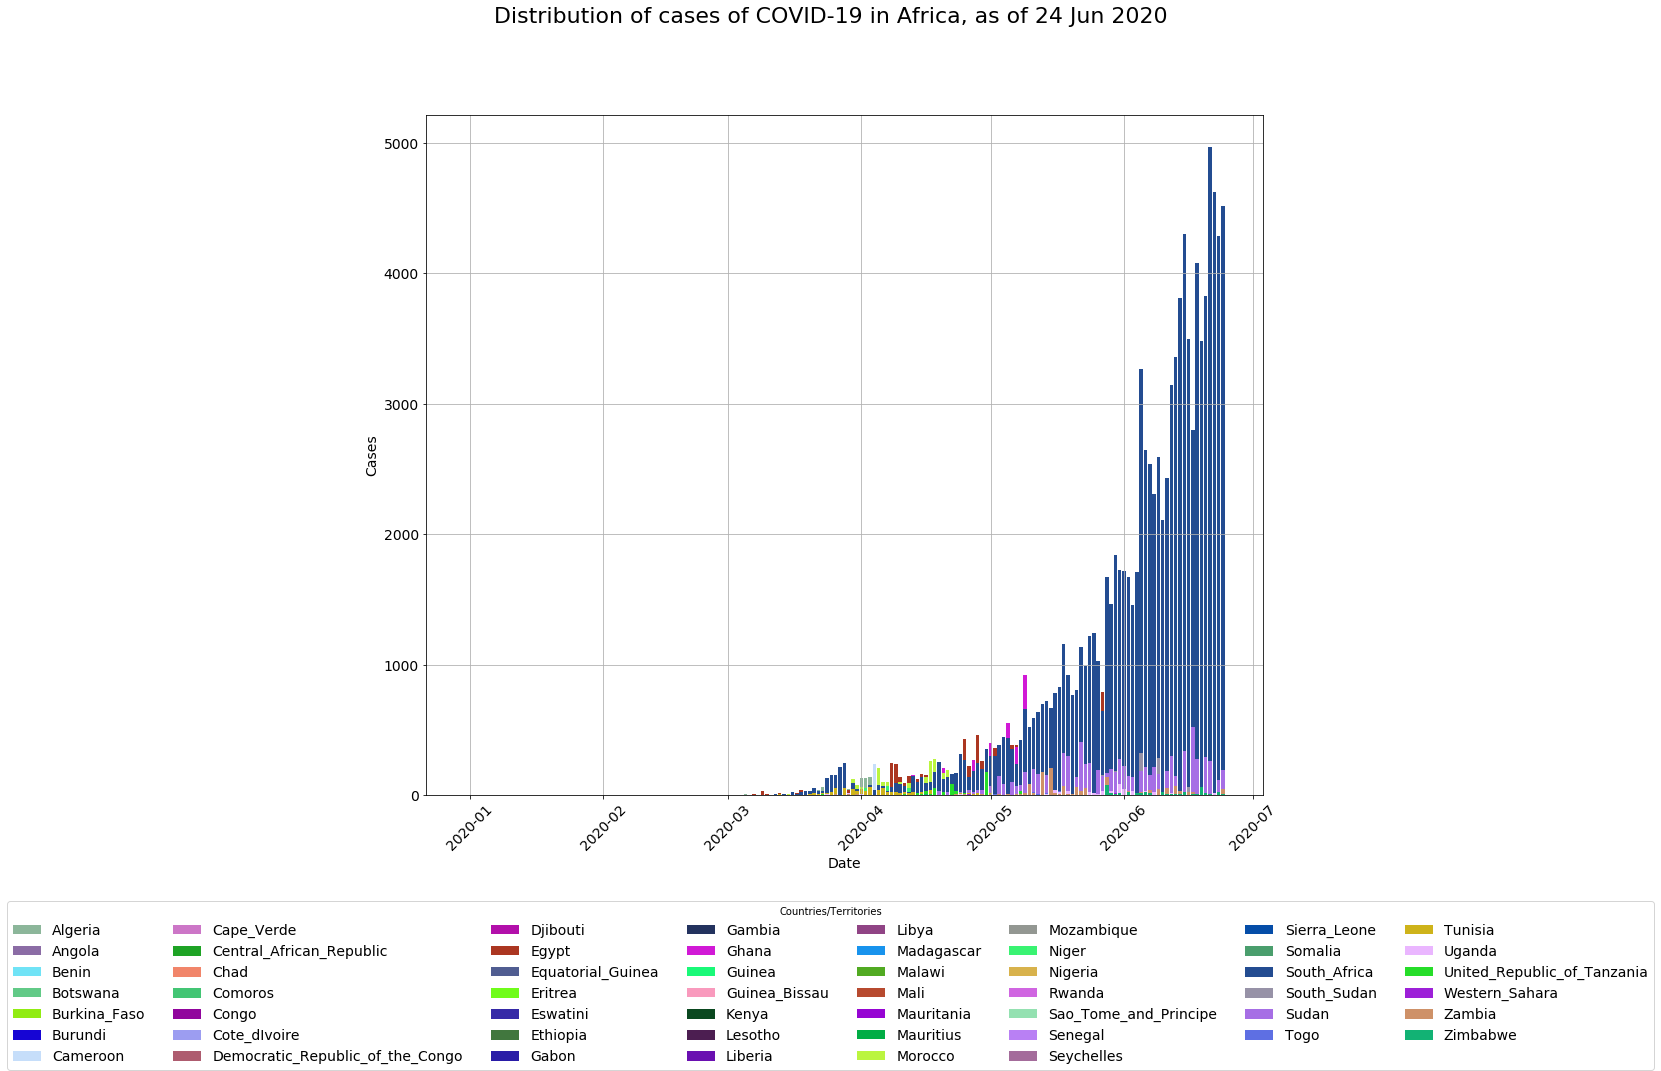

None

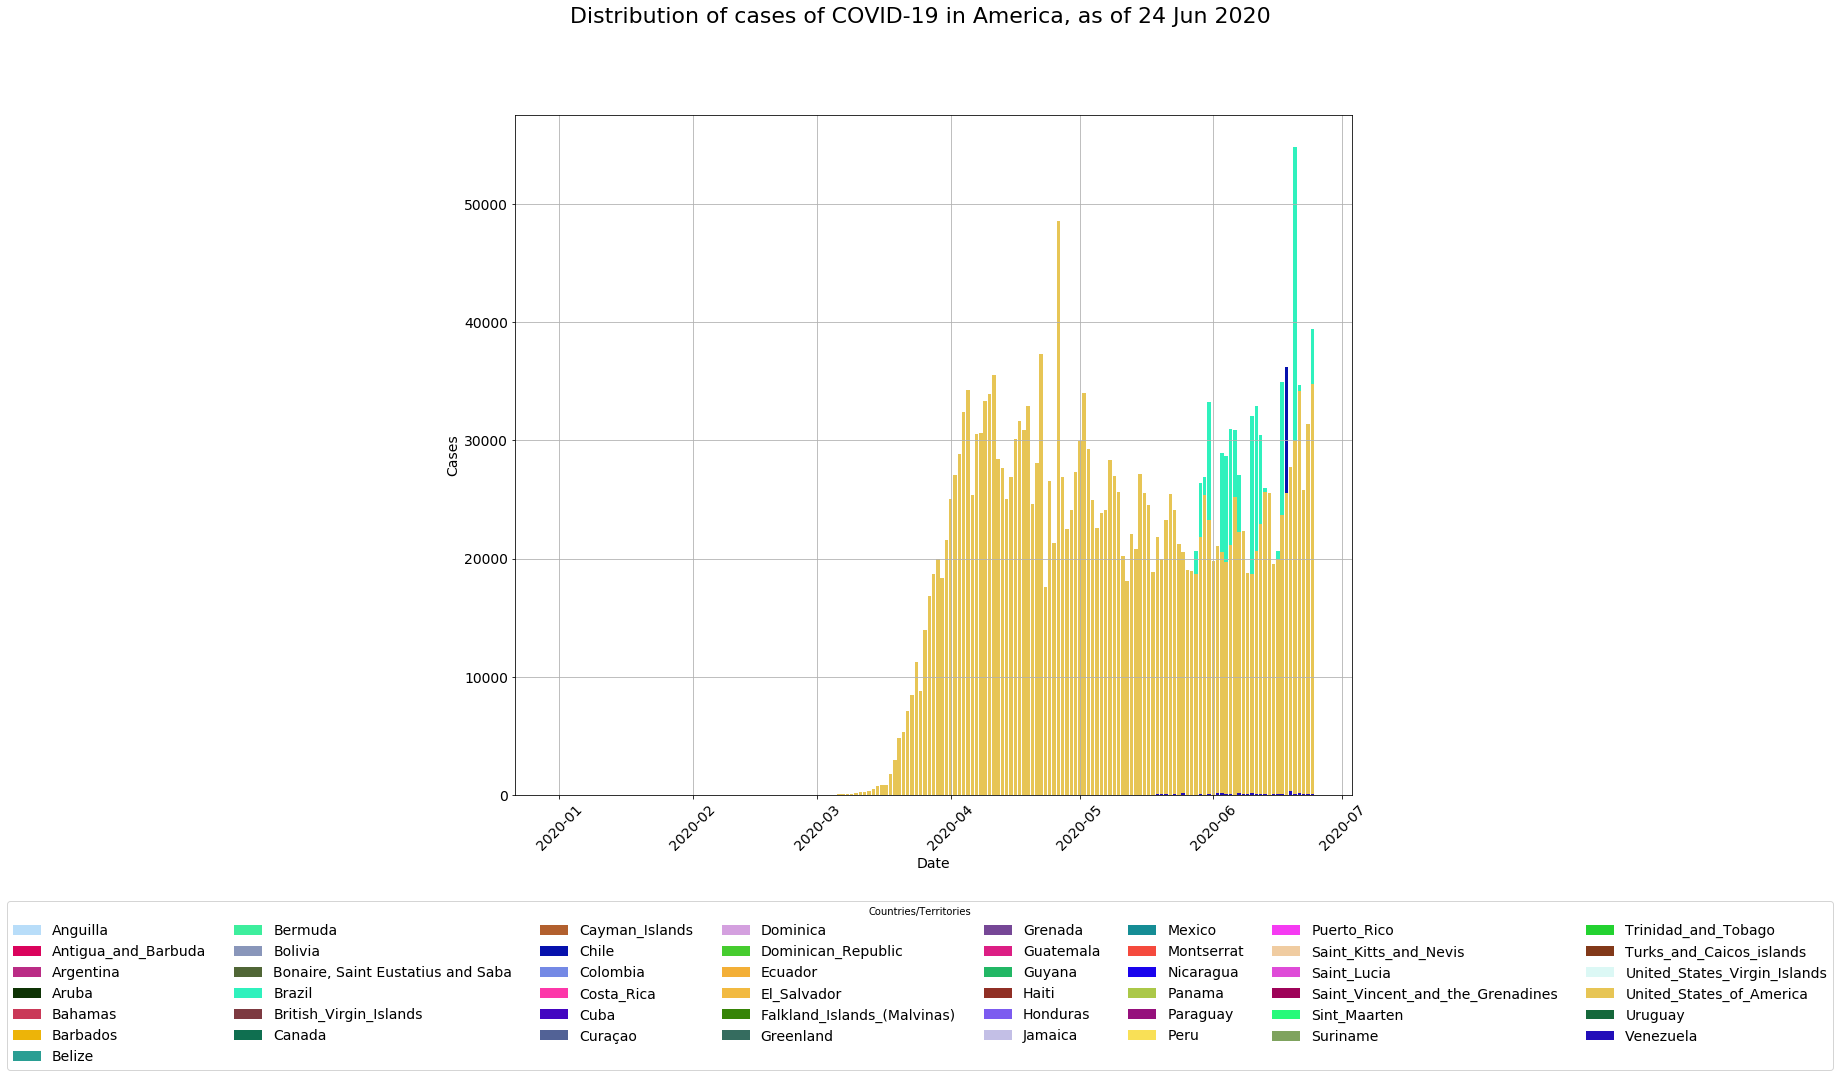

None

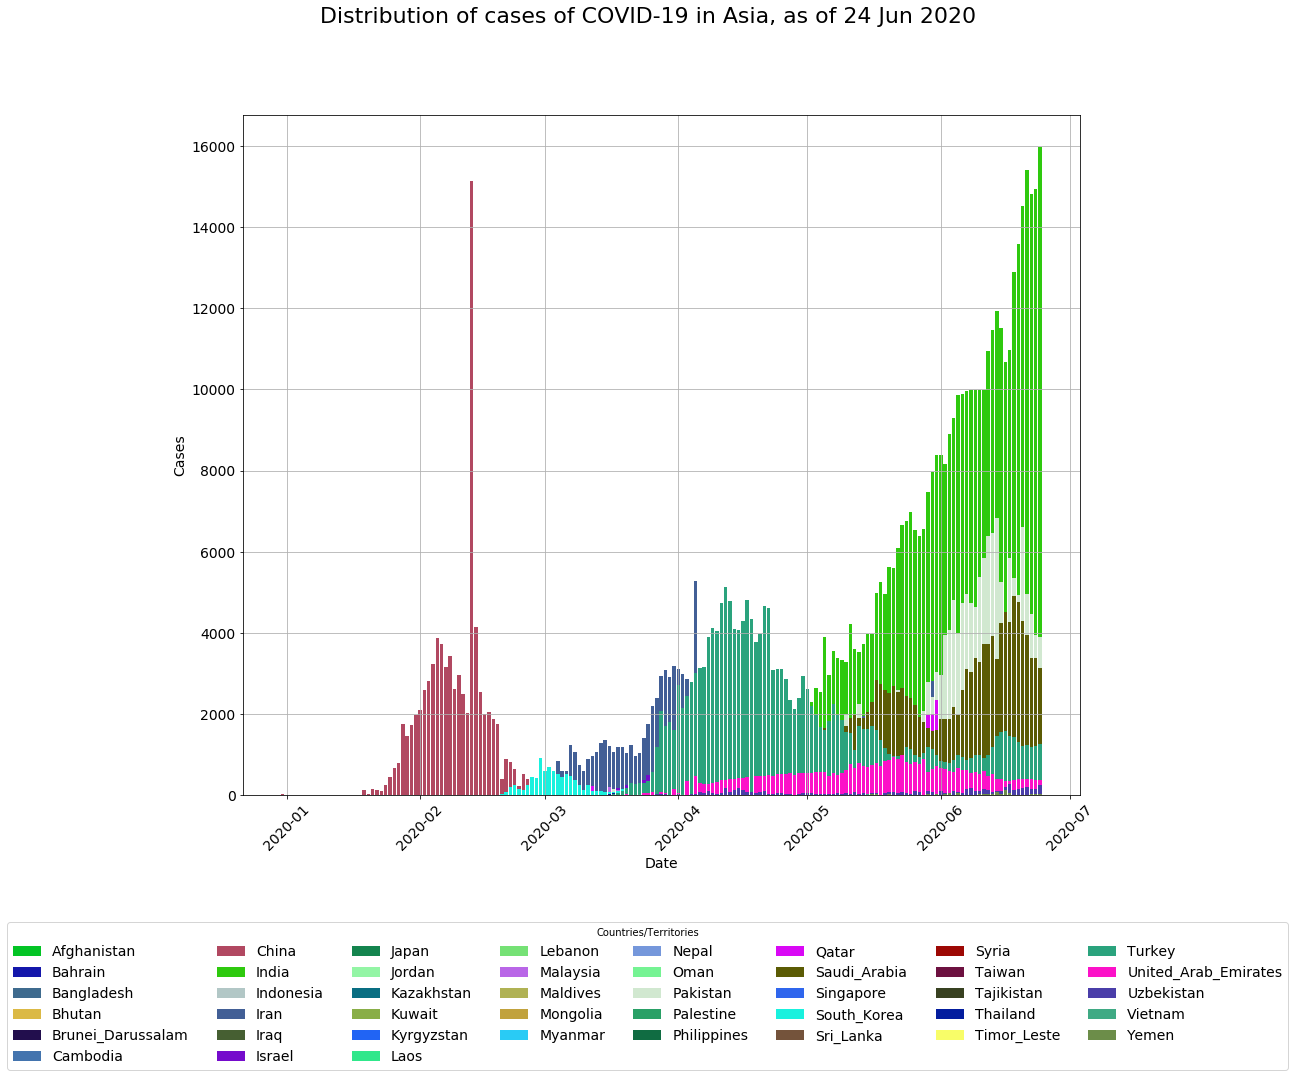

None

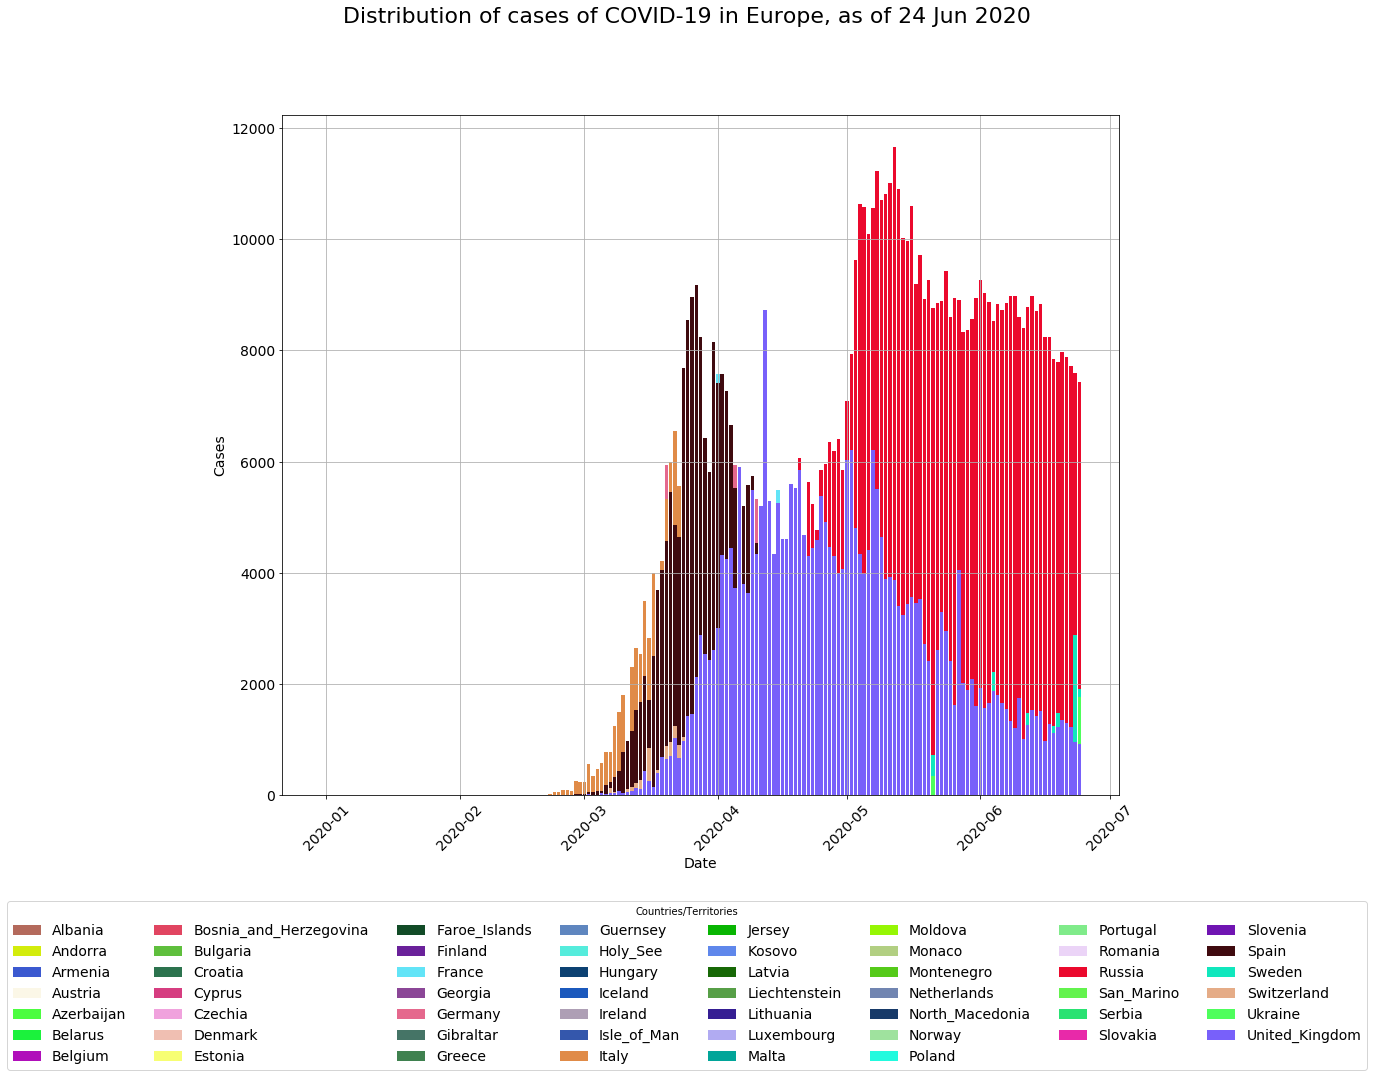

None

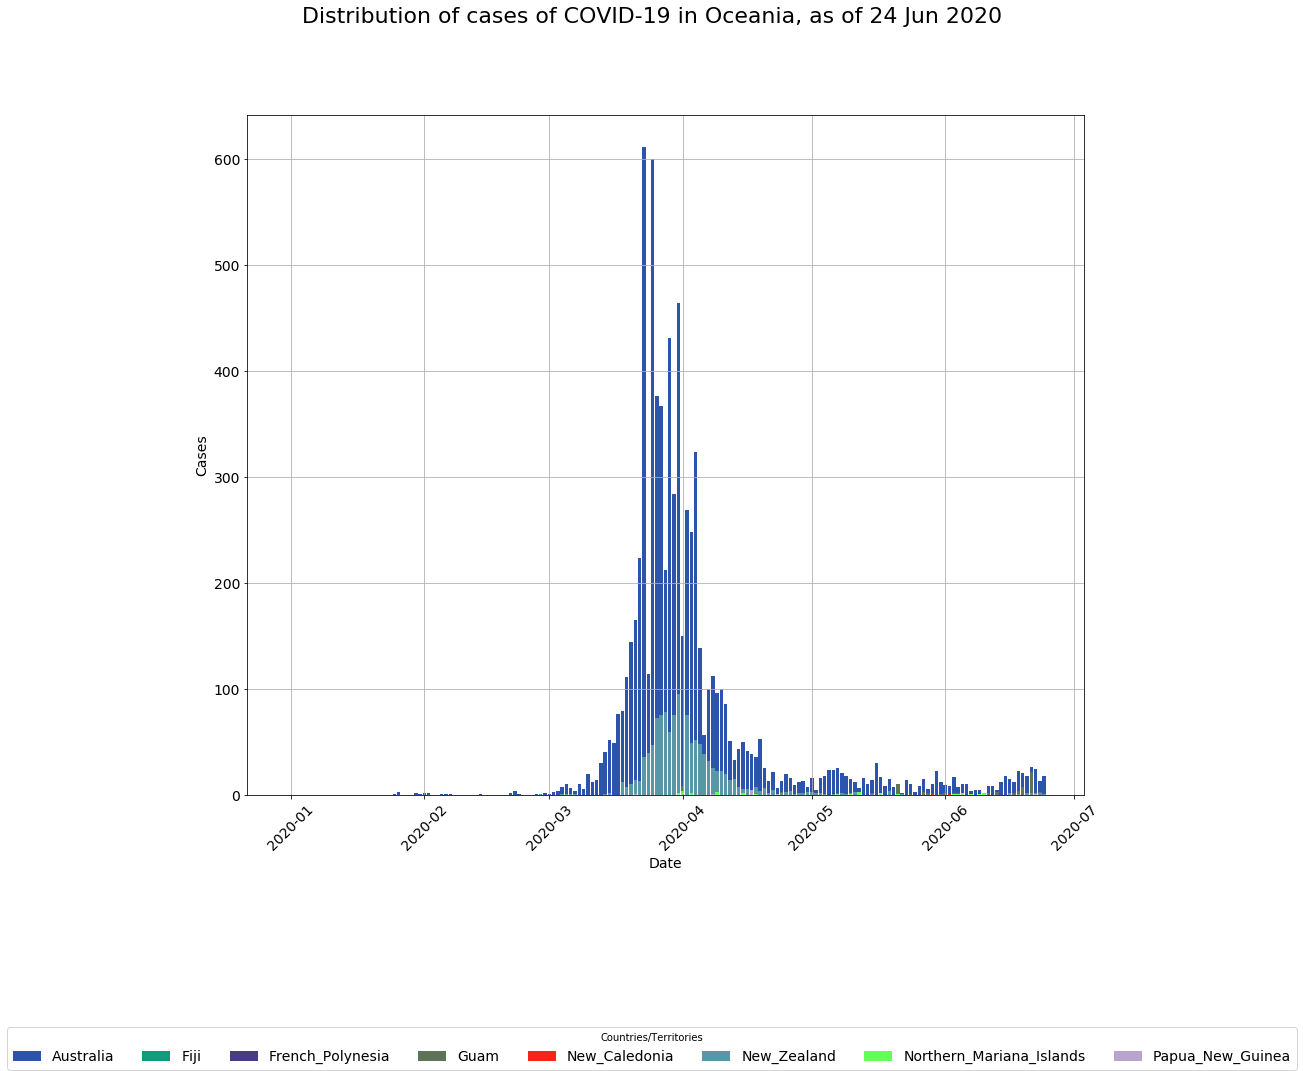

None

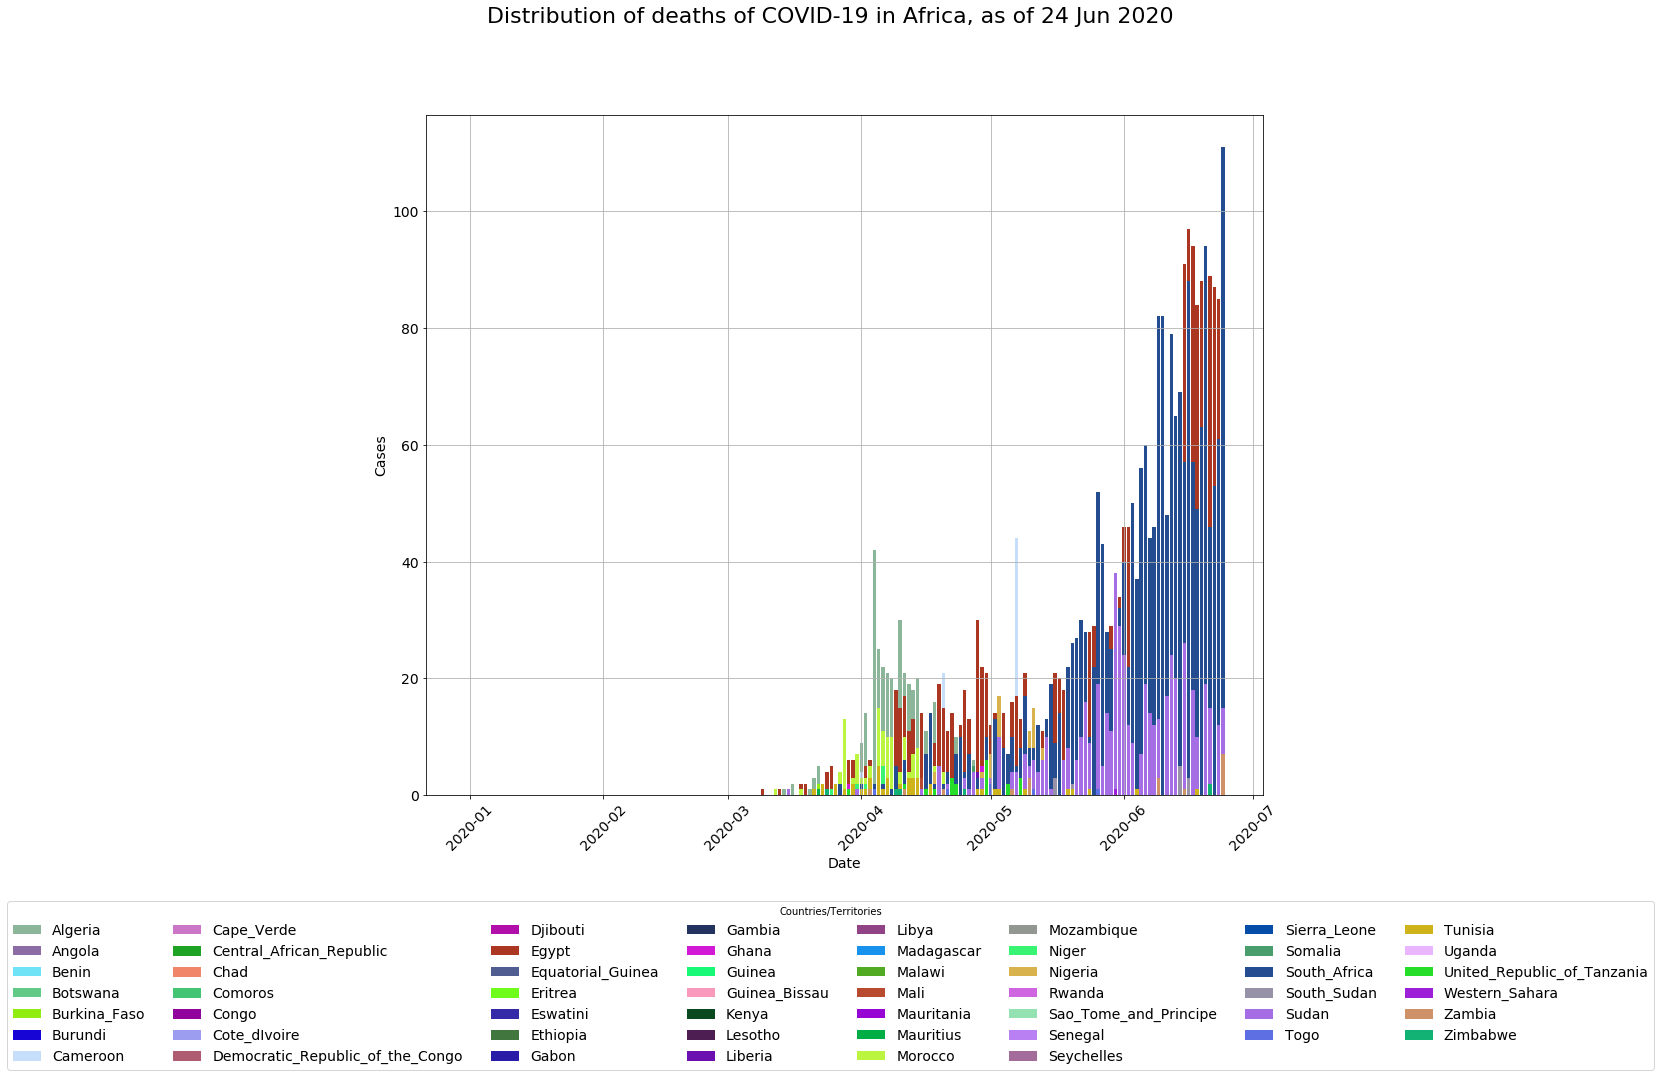

None

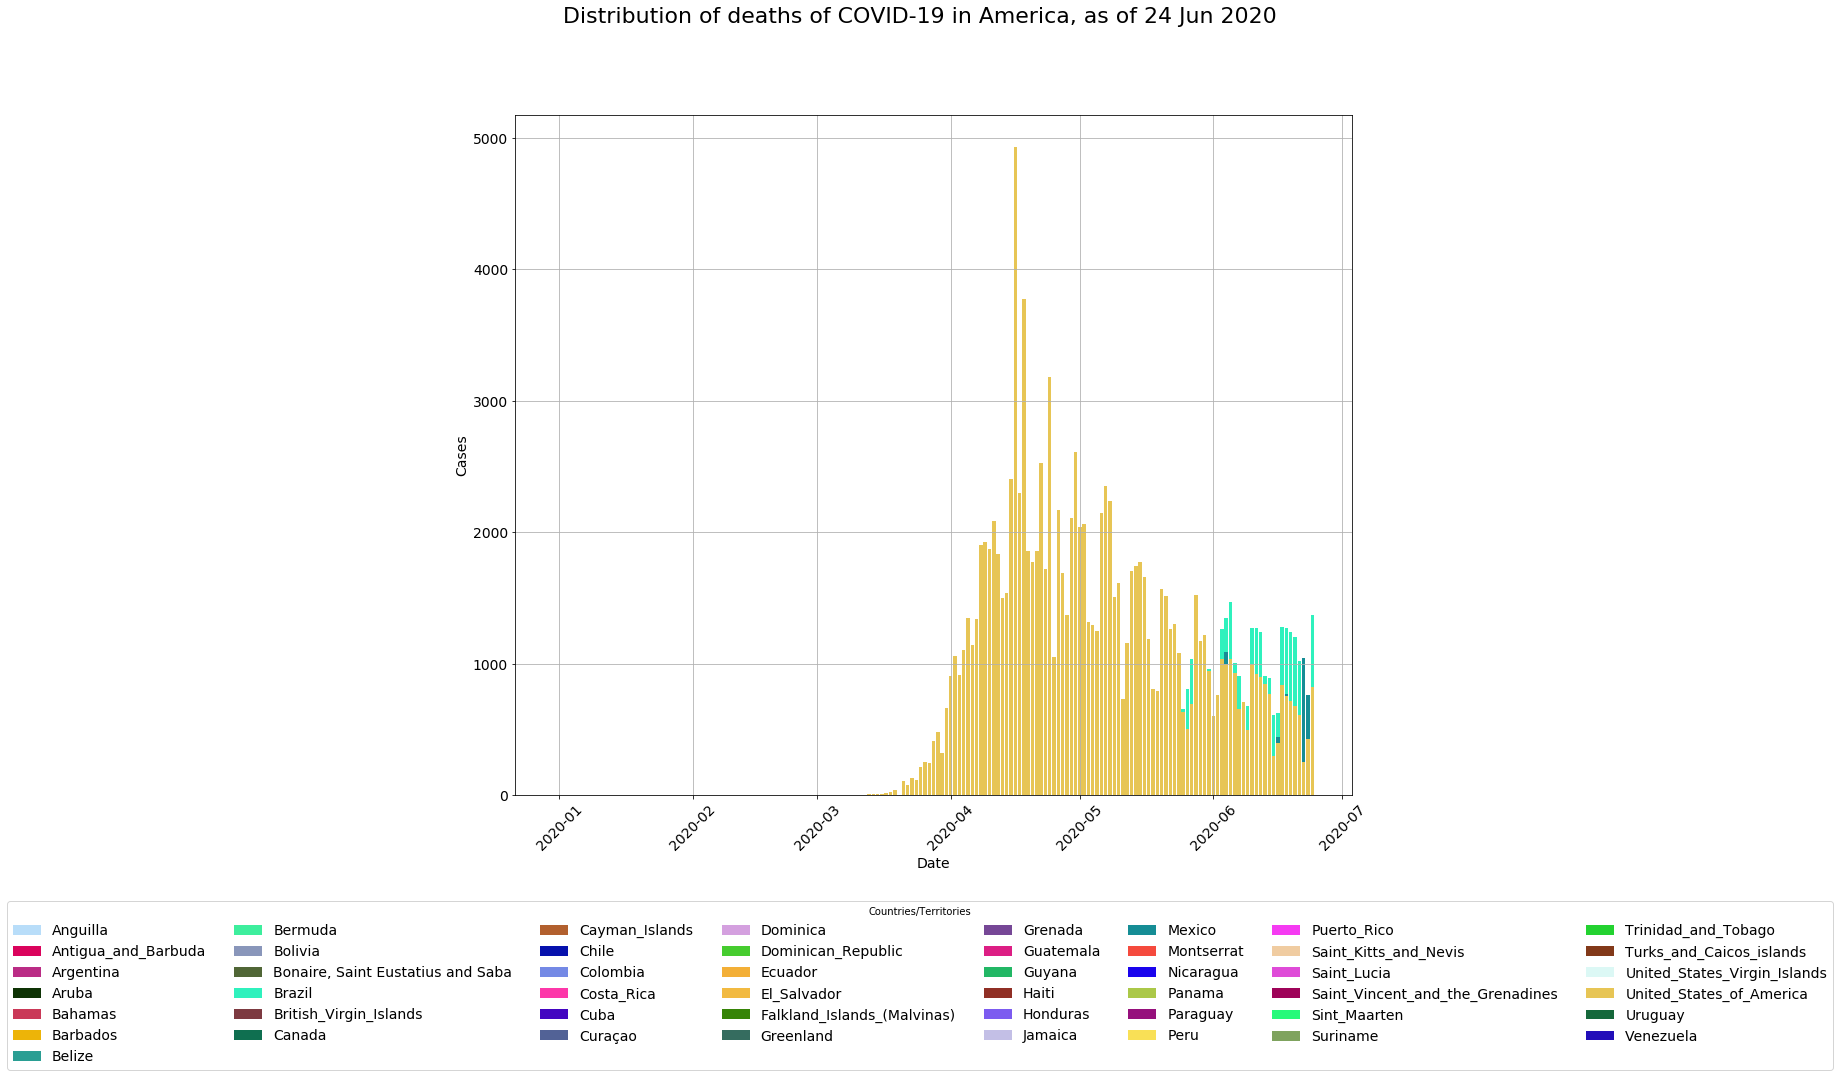

None

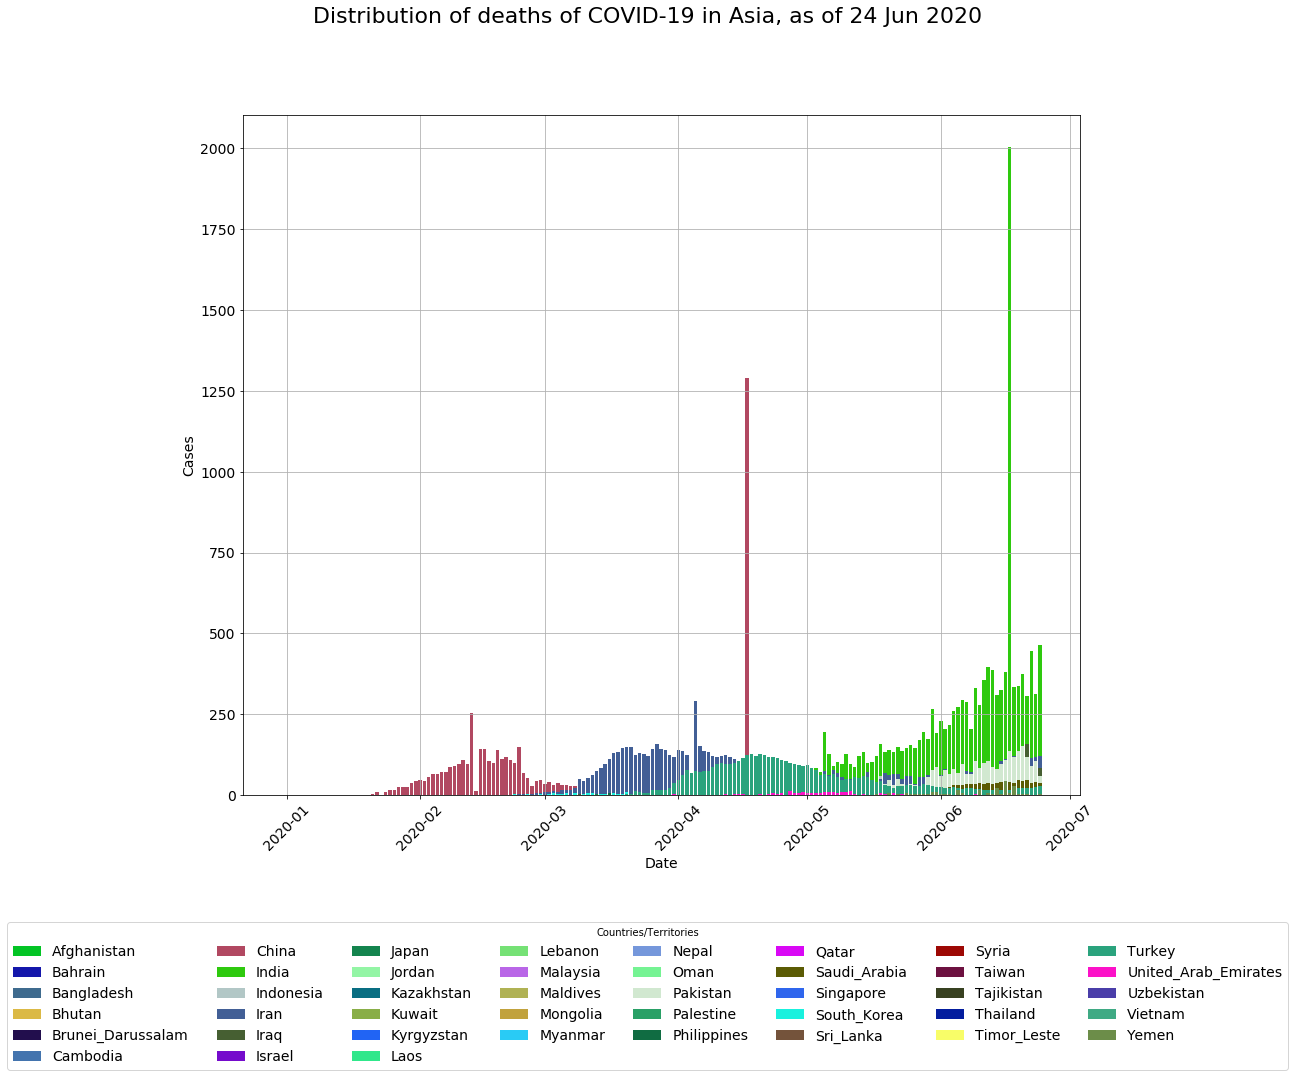

None

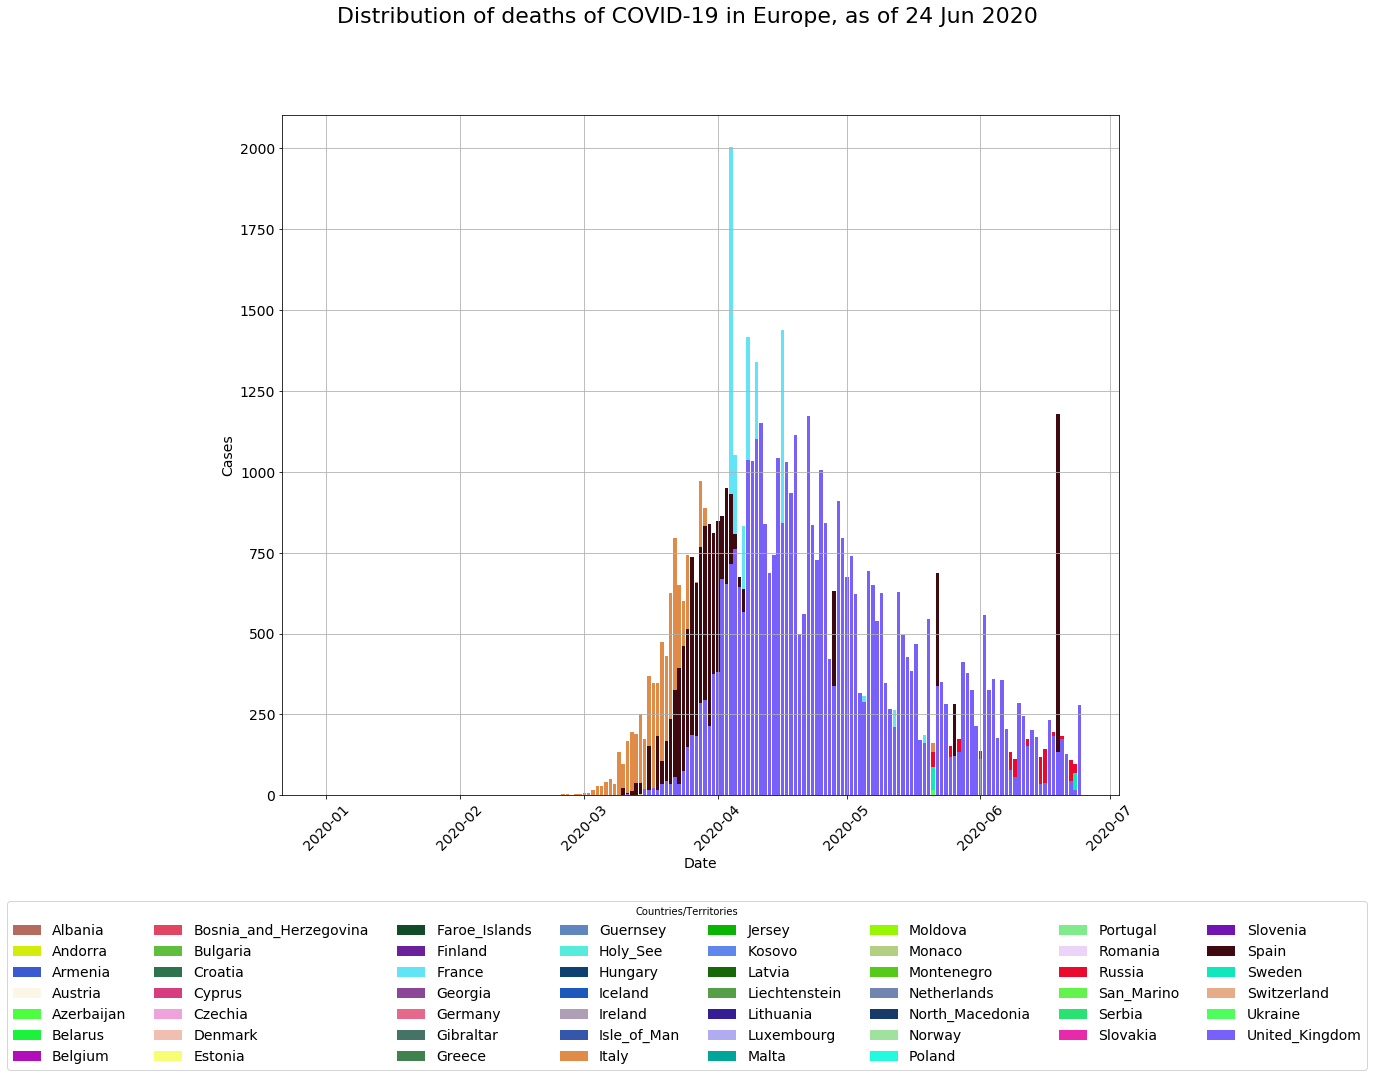

None

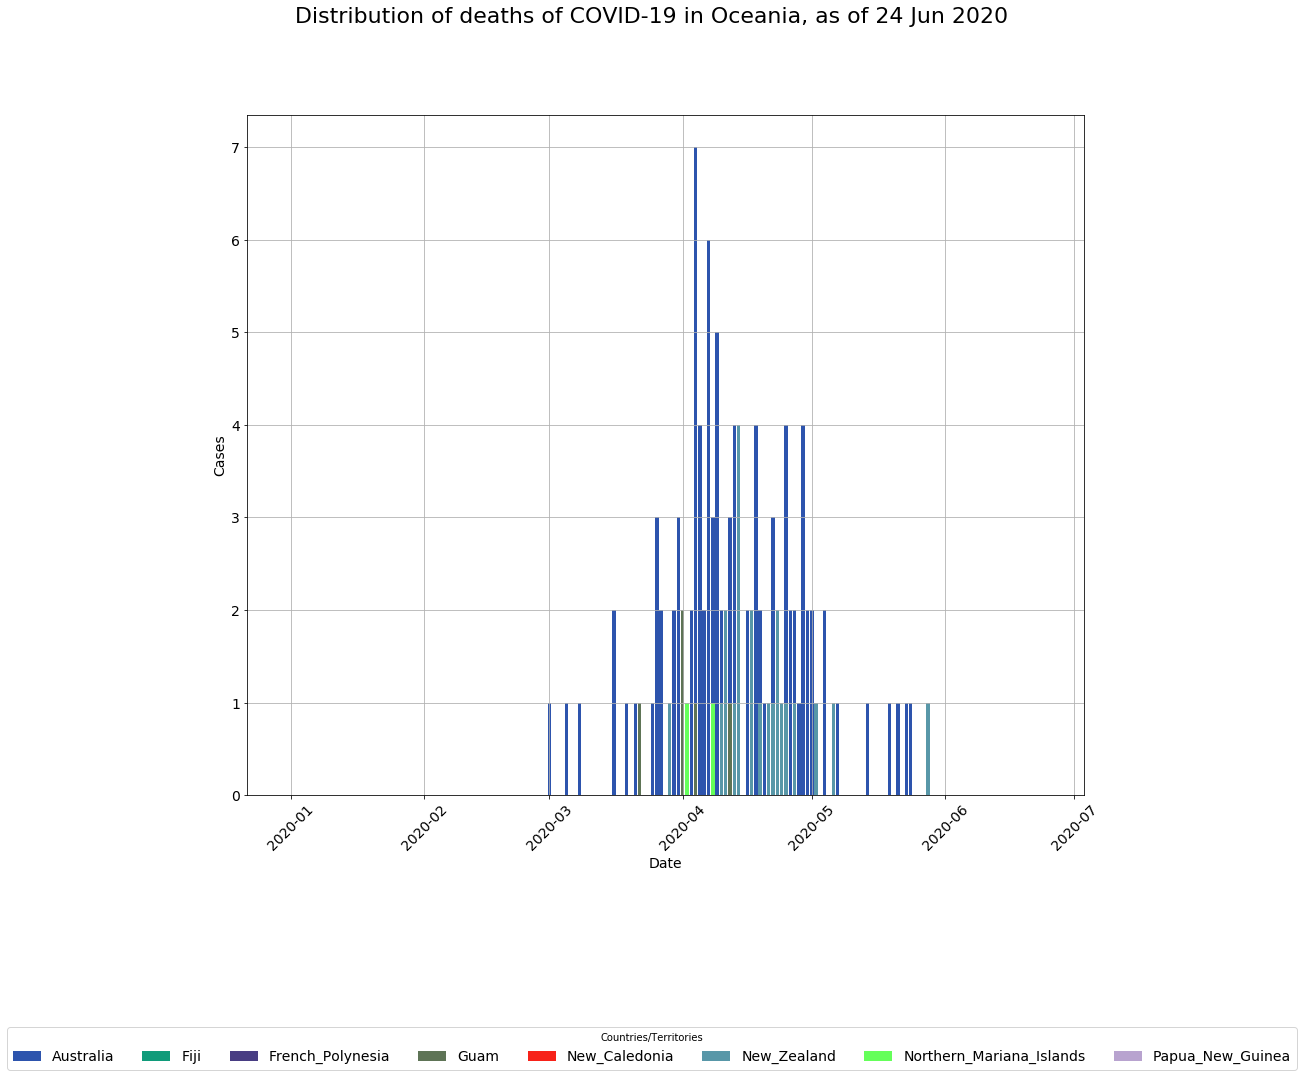

None

In [11]:
# generate distributions
distributions = data.groupby(['continentExp', 'countriesAndTerritories', 'dateRep']).\
    agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()

def plot_distribution(feature):
    x = pd.DataFrame(distributions.dateRep.unique(), columns=['dateRep'])
    np.random.seed(0)

    # loop through each continent and plot cases by country
    for c in distributions.continentExp.unique():
        plt.cla()   # Clear axis
        plt.clf()   # Clear figure
        plt.close() # Close a figure window

        fig, axs = plt.subplots(1, 1, figsize=(15,15)) # make the figure with the size 20 x 20 inches
        width = 0.4

        exp2_source = distributions[distributions['continentExp'] == c]

        axes = []
        legendLabels = []

        for ct in exp2_source.countriesAndTerritories.unique():
            exp2 = exp2_source[(exp2_source['continentExp'] == c) & \
                               (exp2_source['countriesAndTerritories'] == ct)]
            values = {'continentExp': c, 'countriesAndTerritories': ct, 'cases': 0, 'deaths': 0}
            exp2_display = pd.merge(x, exp2, on='dateRep', how='left').fillna(value=values)
            axes.append(axs.bar(exp2_display['dateRep'], exp2_display[feature], color = np.random.rand(3,)))
            legendLabels.append(ct) 

        fig.suptitle('Distribution of ' + feature + ' of COVID-19 in ' + c + ', as of ' + today, fontsize=22)
        fig.legend(labels=legendLabels, 
                   loc="lower center",
                   borderaxespad=0.1,
                   title="Countries/Territories",
                   fontsize = 14,
                   ncol=8)      

        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Cases', fontsize=14)
        plt.subplots_adjust(bottom=0.25)
        plt.grid(True)
        axs.tick_params(axis='x', which='major', labelsize=14, rotation=45)
        axs.tick_params(axis='y', which='major', labelsize=14)
        display(plt.show())
        
plot_distribution('cases')
plot_distribution('deaths')

#### Exploration - Step 3: Distribution of cases and deaths of COVID-19 -- Top 10 cases

In [12]:
# generate distributions
distributions = data.groupby(['continentExp', 'countriesAndTerritories', 'dateRep']).\
    agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()

top10cases = cumulative_cases_deaths_add_features.sort_values(by='Sum of Cases', ascending=False).head(10)
top10distributions = distributions[distributions['countriesAndTerritories'].\
                                   isin(top10cases.countriesAndTerritories.values)]


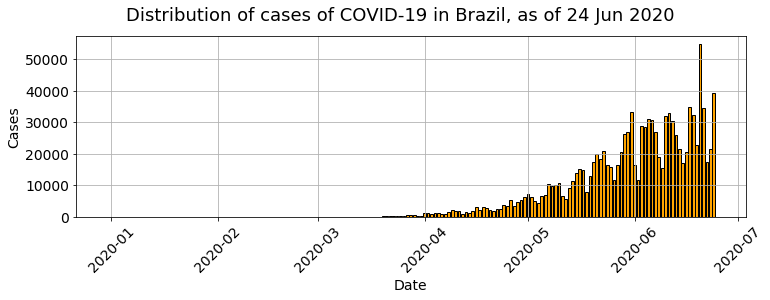

None

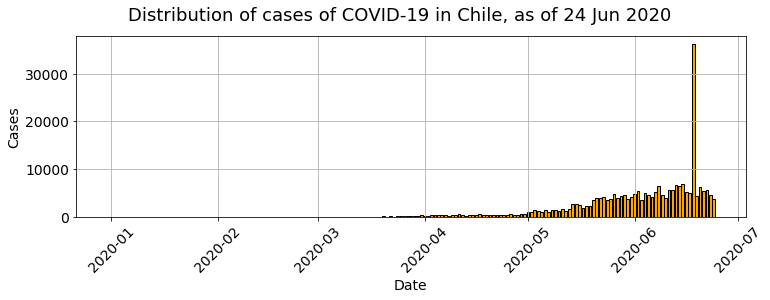

None

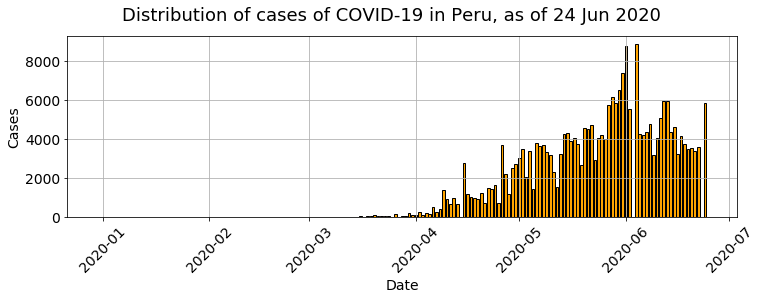

None

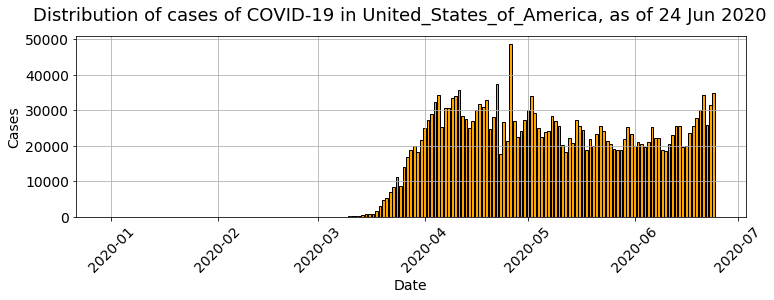

None

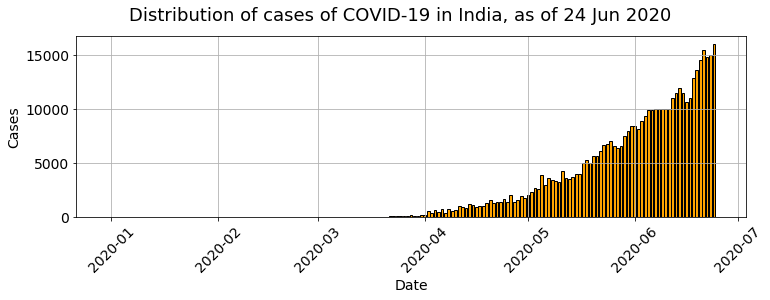

None

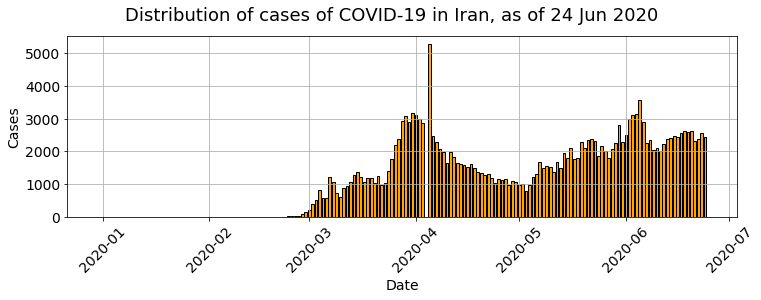

None

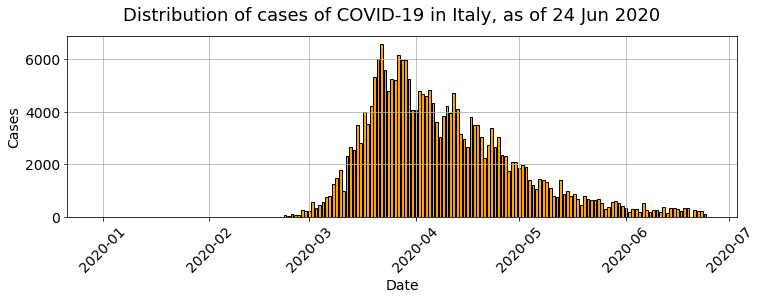

None

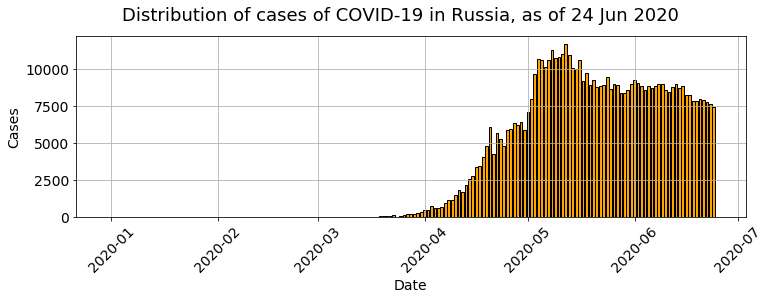

None

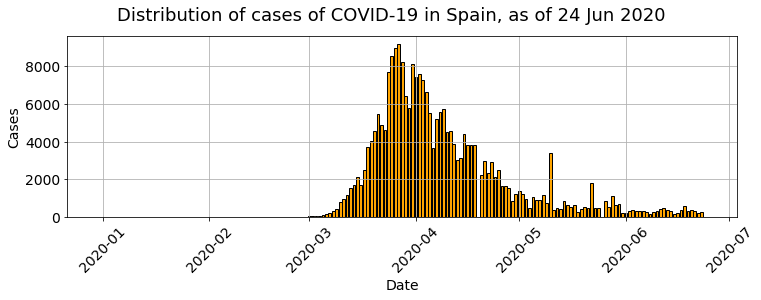

None

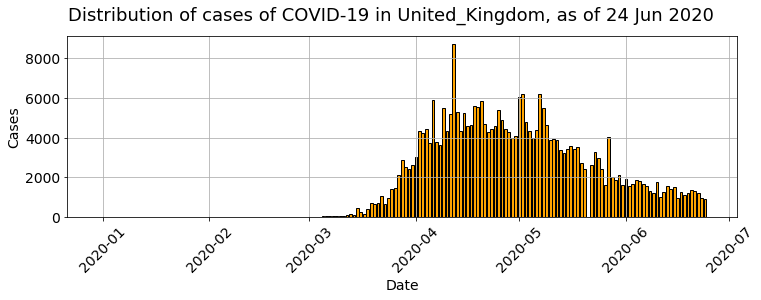

None

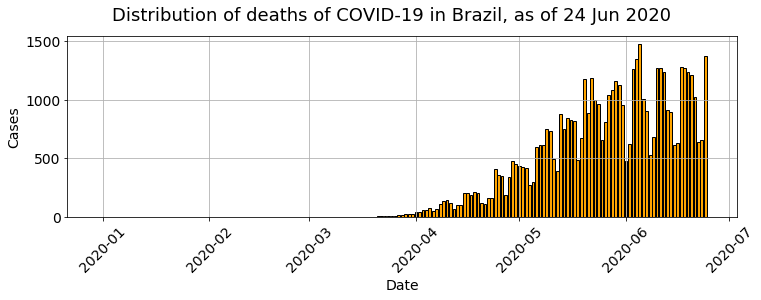

None

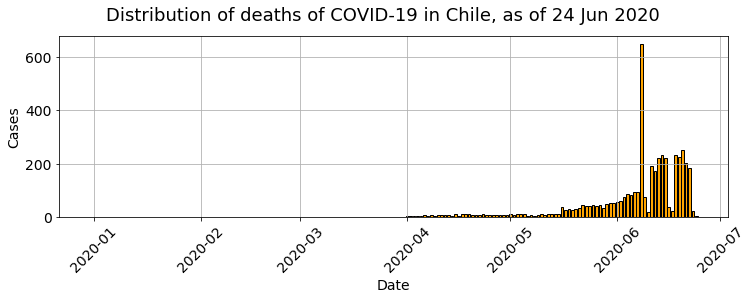

None

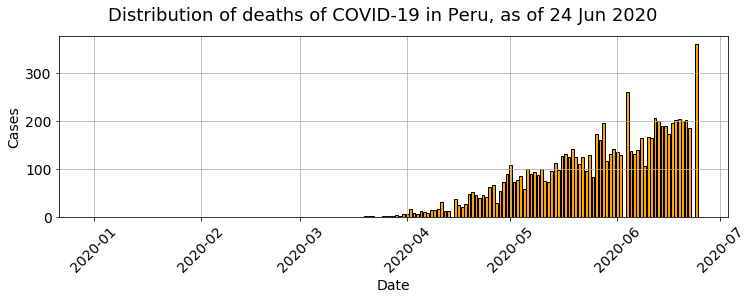

None

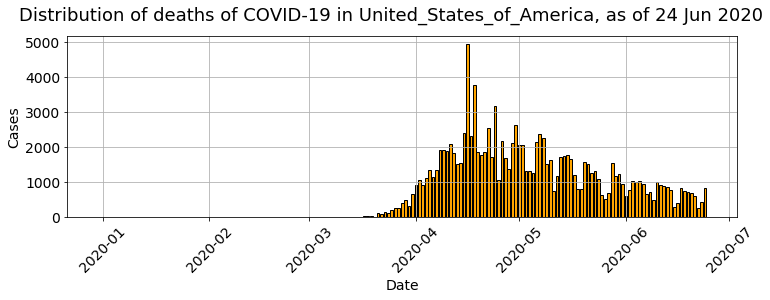

None

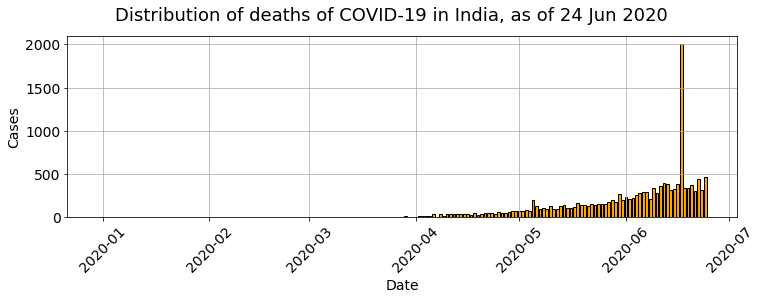

None

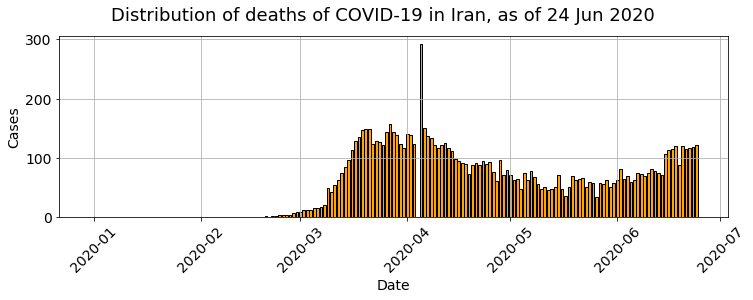

None

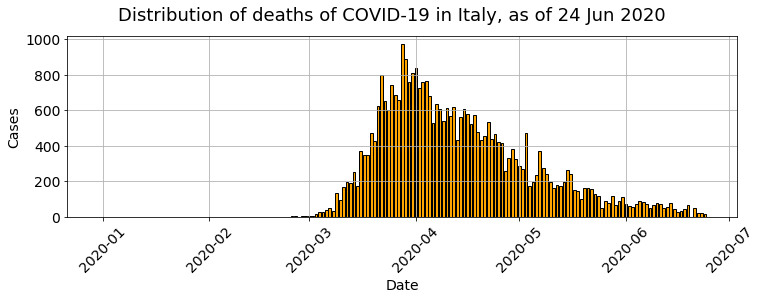

None

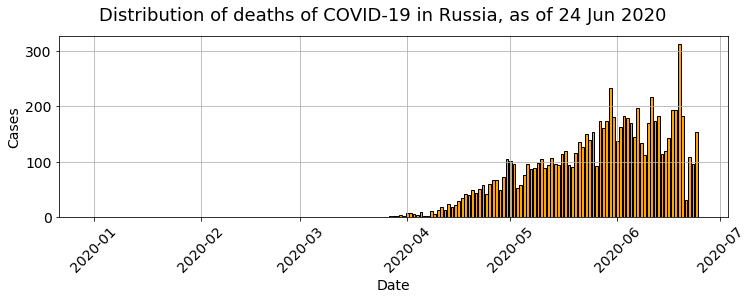

None

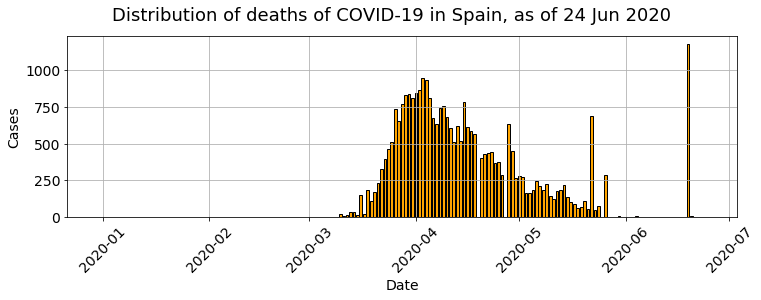

None

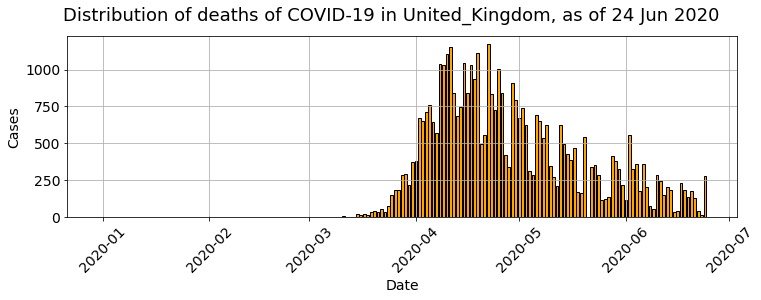

None

In [13]:
def plot_distribution(feature):
    x = pd.DataFrame(distributions.dateRep.unique(), columns=['dateRep'])
    np.random.seed(0)
    
    # loop through each continent and plot cases by country
    for ct in top10distributions.countriesAndTerritories.unique():
        exp2_source = top10distributions[top10distributions['countriesAndTerritories'] == ct]
        
        plt.cla()   # Clear axis
        plt.clf()   # Clear figure
        plt.close() # Close a figure window

        fig, axs = plt.subplots(1, 1, figsize=(12,4)) # make the figure with the size 20 x 20 inches
        width = 0.4

        axes = []

        exp2 = exp2_source[exp2_source['countriesAndTerritories'] == ct]
        values = {'countriesAndTerritories': ct, 'cases': 0, 'deaths': 0}
        exp2_display = pd.merge(x, exp2, on='dateRep', how='left').fillna(value=values)
        axes.append(axs.bar(exp2_display['dateRep'], exp2_display[feature], color = 'orange', edgecolor='k'))

        fig.suptitle('Distribution of ' + feature + ' of COVID-19 in ' + ct + ', as of ' + today, fontsize=18)   

        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Cases', fontsize=14)
        plt.subplots_adjust(bottom=0.25)
        plt.grid(True)
        axs.tick_params(axis='x', which='major', labelsize=14, rotation=45)
        axs.tick_params(axis='y', which='major', labelsize=14)
        display(plt.show())
        
plot_distribution('cases')
plot_distribution('deaths')

#### Exploration - Step 4: What is the fatality ratio across the countries/territories?

In [14]:
cumulative_cases_deaths_add_features = get_facts('countryterritoryCode', 1, 1)

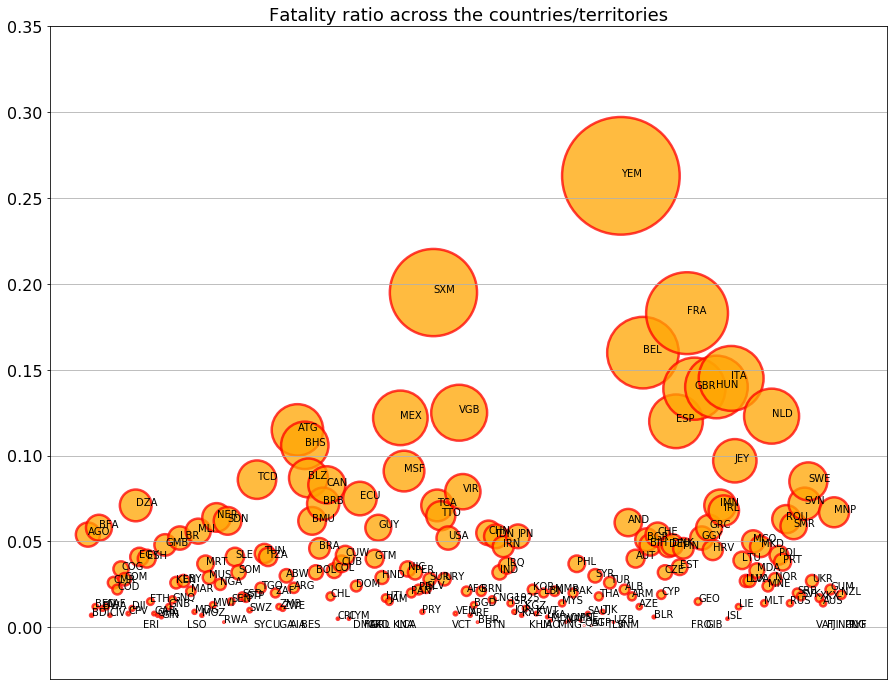

In [15]:
#cumulative_cases_deaths_add_features

plt.cla()   # Clear axis
plt.clf()   # Clear figure
plt.close() # Close a figure window

fr, x = [], []

for i,s in enumerate(cumulative_cases_deaths_add_features['countryterritoryCode']):
    cc = cumulative_cases_deaths_add_features['countryterritoryCode'].iloc[i]
    r = np.round(cumulative_cases_deaths_add_features['Fatality Rate'].iloc[i],3)
    x.append(cc)
    fr.append(r)

fr = np.array(fr)
plt.figure(figsize=(15,12))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.title("Fatality ratio across the countries/territories",fontsize=18)
plt.scatter(x=x,
            y=fr,
            s=2e5*fr**2,
            color='orange',edgecolor='red',alpha=0.75,linewidth=2.5)

for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],fr[i]))

plt.ylim(-0.03,0.35)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()

#### Exploration - Step 5: Is the death count incresing with the rate of cases in the US?

Countries investigated:
- United_Kingdom
- Spain
- Italy
- Germany
- France
- Russia
- India
- Iran
- Turkey
- Pakistan
- China
- United_States_of_America
- Brazil
- Peru
- Chile
- Mexico
- Canada
- South_Africa
- Egypt

In [16]:
# generate distributions
distributions = data.groupby(['continentExp', 'countriesAndTerritories', 'dateRep']).\
    agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()

In [17]:
# Function to create scatter plot of two variables for a given country/territory
def plot_xy(varx='cases',
            vary='deaths',
            attr='United_States_of_America'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(varx)==str, "Expected string as the variable x name"
    assert type(vary)==str, "Expected string as the variable y name"
    
    plt.cla()   # Clear axis
    plt.clf()   # Clear figure
    plt.close() # Close a figure window
 
    y = distributions[distributions['countriesAndTerritories']==attr][vary]
    x = distributions[distributions['countriesAndTerritories']==attr][varx]
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(12,4))
        plt.title("Plot of \"{}\" vs. \"{}\" for {}".format(varx,vary,attr),fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='lightgreen',s=100)
        plt.grid(True)
        plt.tick_params(axis='x', which='major', labelsize=14, rotation=45)
        plt.tick_params(axis='y', which='major', labelsize=14)
        plt.show()
    else:
        print("Some of the data unavailable for a scatter plot. Sorry!")

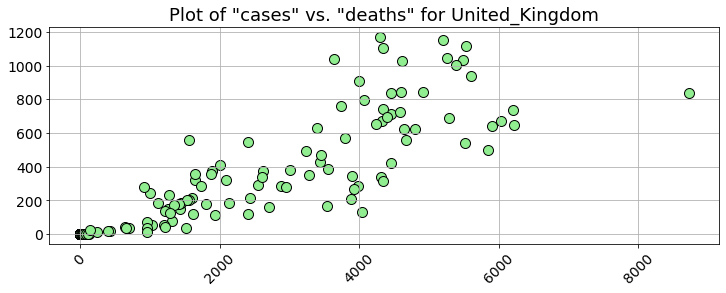

None

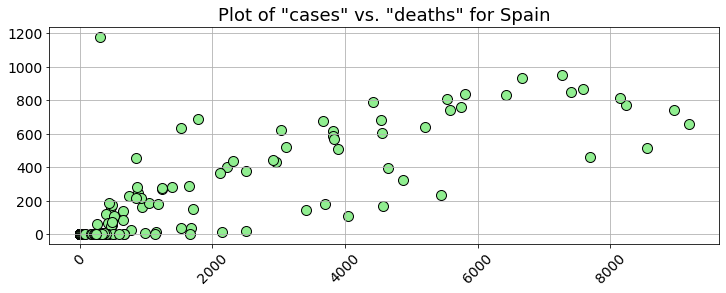

None

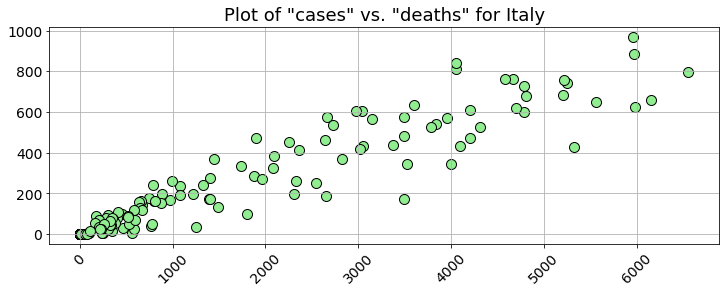

None

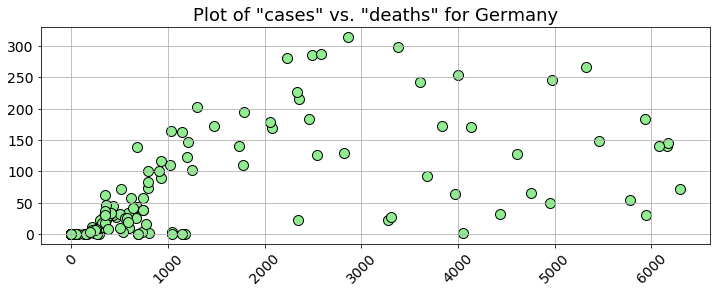

None

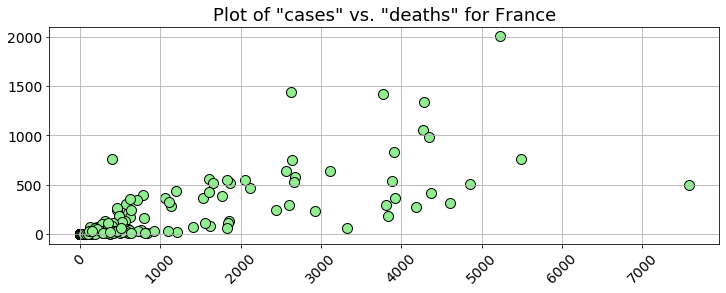

None

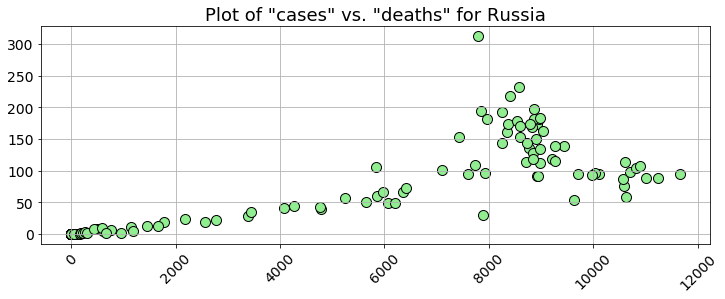

None

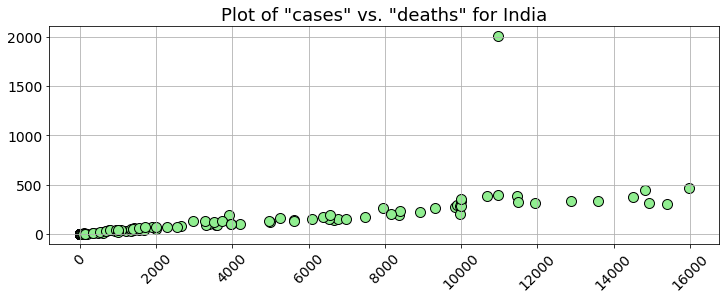

None

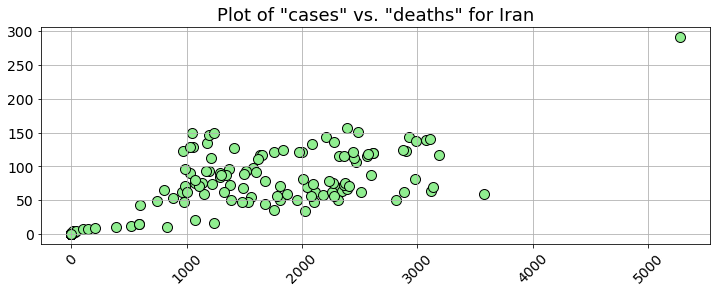

None

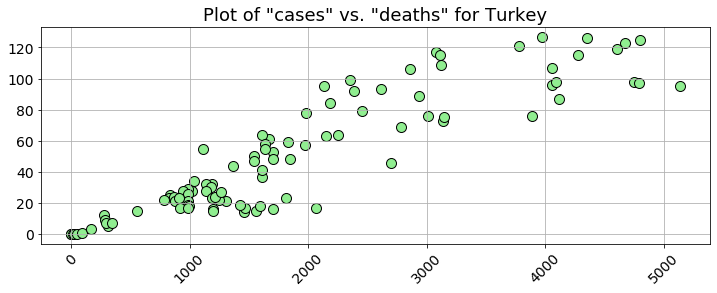

None

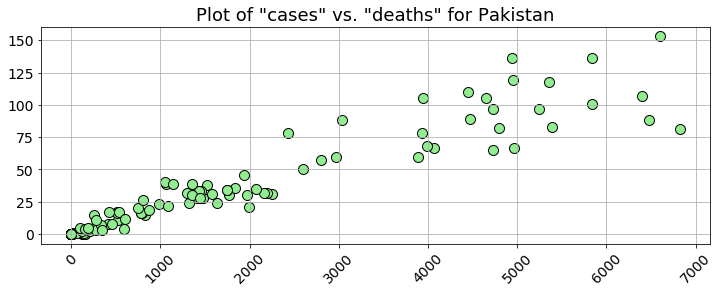

None

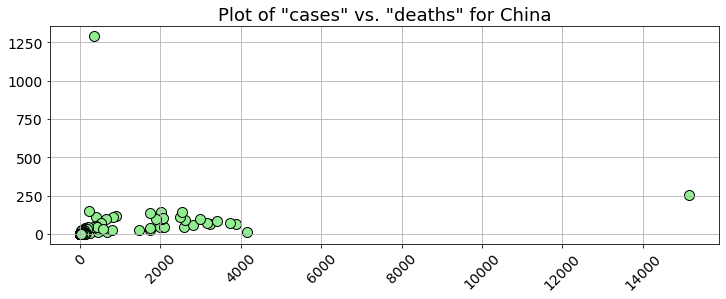

None

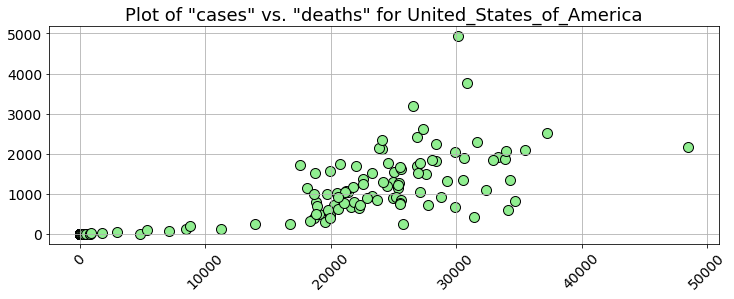

None

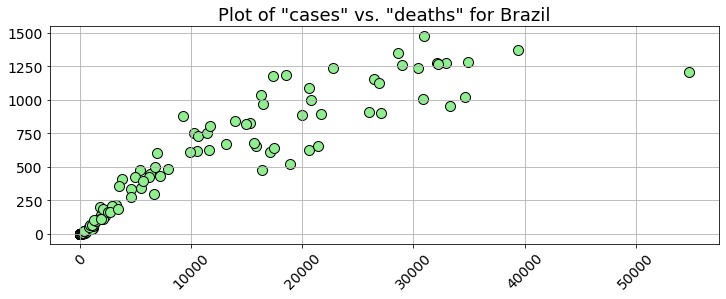

None

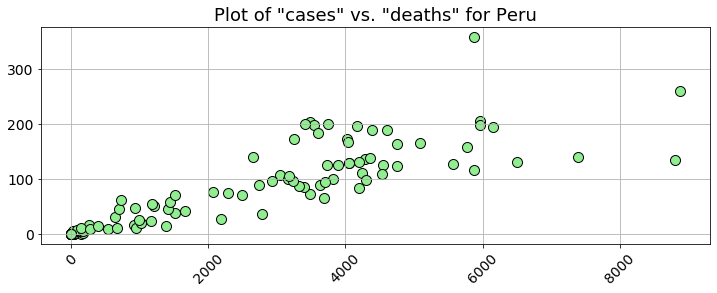

None

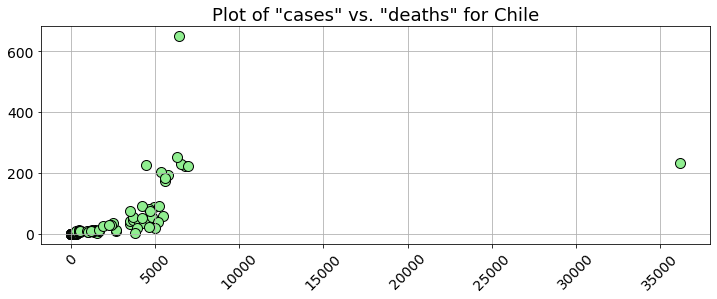

None

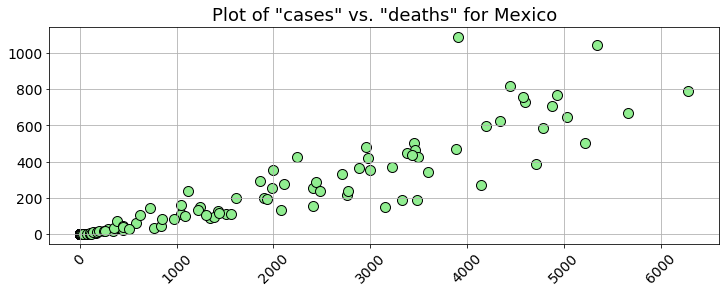

None

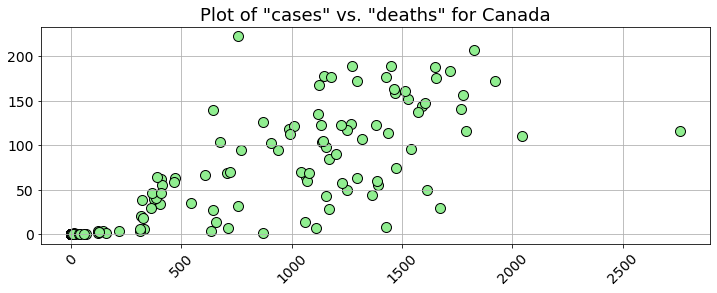

None

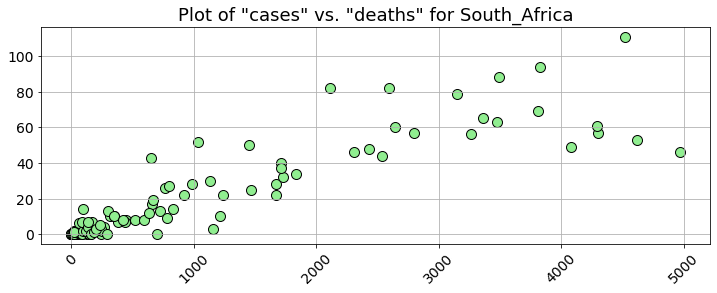

None

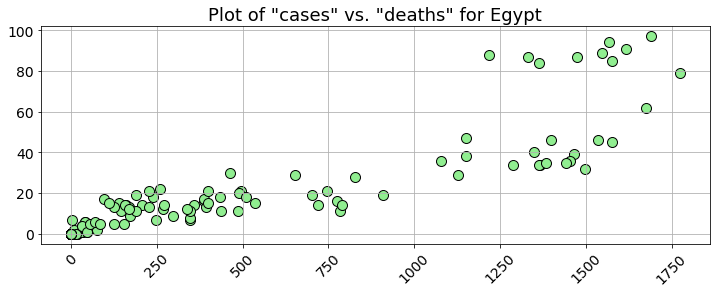

None

In [18]:
c_list = ['United_Kingdom', 'Spain', 'Italy', 'Germany', 'France', 'Russia', 'India', 'Iran', 'Turkey', 
    'Pakistan', 'China', 'United_States_of_America', 'Brazil', 'Peru', 'Chile', 'Mexico', 'Canada', 
    'South_Africa','Egypt']

for c in c_list:
    display(plot_xy(attr=c))

### Data scaling and comparisons (10 points)
#### 'Fatality Rate Variable' Transformation using Scikit Learn

In [19]:
variable = get_facts()

In [20]:
def create_plot(x_attr, y_attr, plot_type):
    x = variable[x_attr]
    y = np.array(variable[y_attr]).reshape(-1,1)
    
    if(plot_type == 'Unscaled'):
        y = variable[y_attr]
    elif(plot_type == 'StandardScaler'):
        y = StandardScaler().fit_transform(y)
    elif(plot_type == 'MinMaxScaler'):
        y = MinMaxScaler().fit_transform(y)
    elif(plot_type == 'MaxAbsScaler'):
        y = MaxAbsScaler().fit_transform(y)
    elif(plot_type == 'RobustScaler'):
        y = RobustScaler(quantile_range=(25, 75)).fit_transform(y)
    elif(plot_type == 'PowerTransformer-yeo-johnson'):
        y = PowerTransformer(method='yeo-johnson').fit_transform(y)
    elif(plot_type == 'sample-wise L2 normalizing'):
        y = Normalizer().fit_transform(y)
        
    
    plt.cla()   # Clear axis
    plt.clf()   # Clear figure
    plt.close() # Close a figure window

    plt.figure(figsize=(12,4))
    plt.title('{} {}'.format(y_attr, plot_type),fontsize=18)
    plt.scatter(x=x,y=y,edgecolor='k',color='lightgreen',s=100)
    plt.grid(True)
    plt.tick_params(axis='x', which='major', labelsize=14, rotation=45)
    plt.tick_params(axis='y', which='major', labelsize=14)
    plt.show()
    

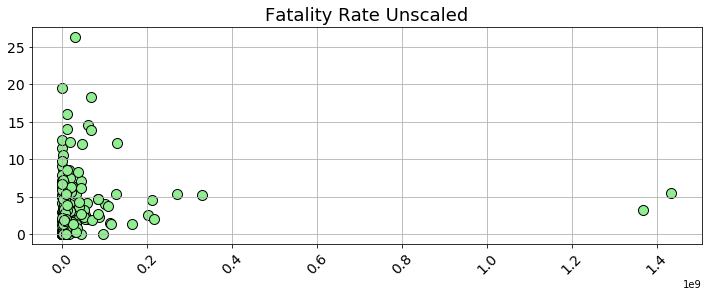

None

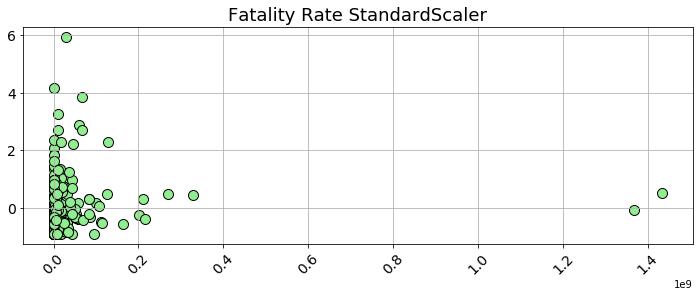

None

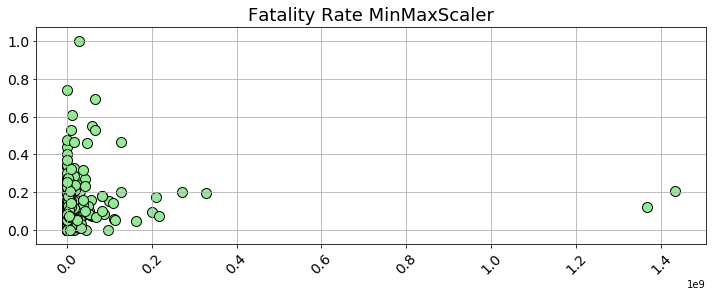

None

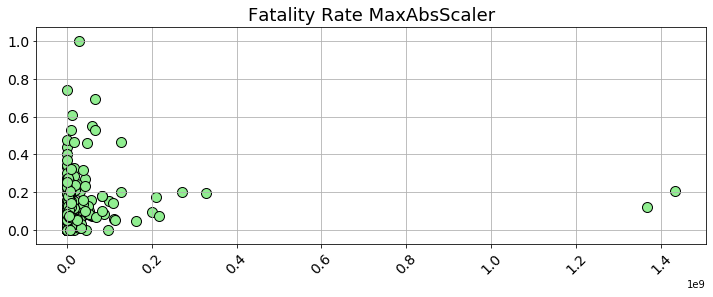

None

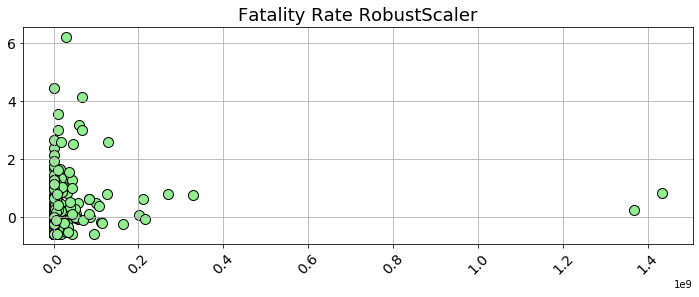

None

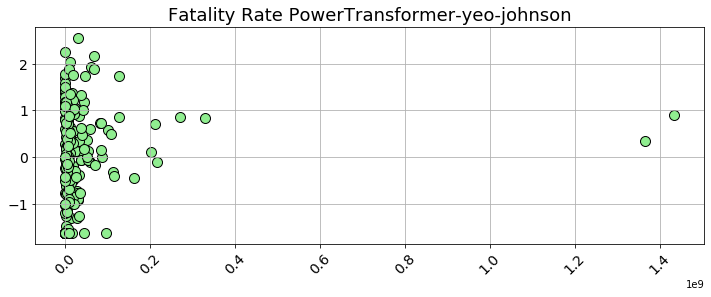

None

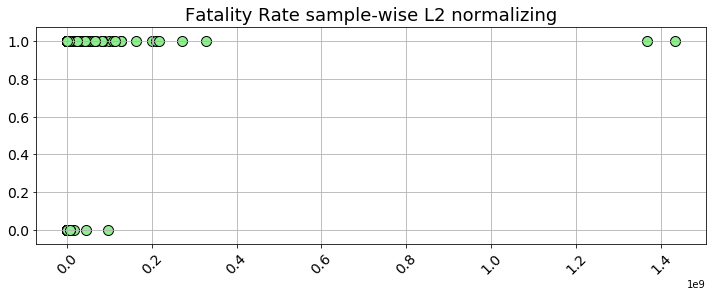

None

In [21]:
display(create_plot('Population', 'Fatality Rate', 'Unscaled'))
display(create_plot('Population', 'Fatality Rate', 'StandardScaler'))
display(create_plot('Population', 'Fatality Rate', 'MinMaxScaler'))
display(create_plot('Population', 'Fatality Rate', 'MaxAbsScaler'))
display(create_plot('Population', 'Fatality Rate', 'RobustScaler'))
display(create_plot('Population', 'Fatality Rate', 'PowerTransformer-yeo-johnson'))
display(create_plot('Population', 'Fatality Rate', 'sample-wise L2 normalizing'))

### Insights from analysis (10 points)

Put Insights Here